In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV (đảm bảo bạn có đường dẫn đúng)
df = pd.read_csv('SampleSuperstore.csv')


In [ ]:
# Hiển thị 5 dòng đầu tiên của dữ liệu
print(df.head())

# Hiển thị thông tin về cấu trúc dữ liệu, kiểu dữ liệu
print(df.info())

# Tính toán các thống kê mô tả cơ bản
print(df.describe())


In [ ]:
#Hiển thị số lượng đơn hàng cho mỗi loại sản phẩm.
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df)
plt.title('Số lượng đơn hàng theo mỗi loại sản phẩm')
plt.xlabel('Loại Sản Phẩm')
plt.ylabel('Số Lượng')
plt.show()


In [ ]:
#Hiển thị số lượng đơn hàng cho mỗi khu vực.
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=df)
plt.title('Số lượng đơn hàng theo mỗi khu vực')
plt.xlabel('Khu Vực')
plt.ylabel('Số Lượng')
plt.show()


In [ ]:
#Hiển thị phân phối của biến 'Sales'.
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=20, kde=False, color='skyblue')
plt.title('Phân phối của biến "Sales"')
plt.xlabel('Doanh số bán hàng')
plt.ylabel('Tần suất')
plt.show()


In [ ]:
#Hiển thị mối quan hệ giữa doanh số bán hàng và lợi nhuận.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category')
plt.title('Biểu đồ scatter giữa Sales và Profit')
plt.xlabel('Doanh số bán hàng')
plt.ylabel('Lợi nhuận')
plt.show()


In [ ]:
#Hiển thị mối quan hệ giữa 'Sales', 'Profit', và 'Discount'.
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Sales', 'Profit', 'Discount']])
plt.suptitle('Biểu đồ tương quan đa biến')
plt.show()


In [ ]:
#Tính toán ma trận tương quan để đánh giá mức độ tương quan giữa các biến số.
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Ma trận tương quan')
plt.show()


In [ ]:
#Hiển thị biểu đồ scatter giữa các cặp biến để xem mức độ tương quan giữa chúng.
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Sales', 'Profit', 'Quantity', 'Discount']])
plt.suptitle('Biểu đồ scatter tương quan')
plt.show()

In [ ]:
#Phân loại dữ liệu và hiển thị biểu đồ tương quan cho từng nhóm.
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Sales', 'Profit', 'Quantity', 'Discount', 'Category']], hue='Category')
plt.suptitle('Biểu đồ scatter tương quan theo loại sản phẩm')
plt.show()


In [ ]:
#Sử dụng boxplot để hiển thị tương quan giữa các biến số và phân loại.
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Boxplot cho tương quan giữa Category và Sales')
plt.show()


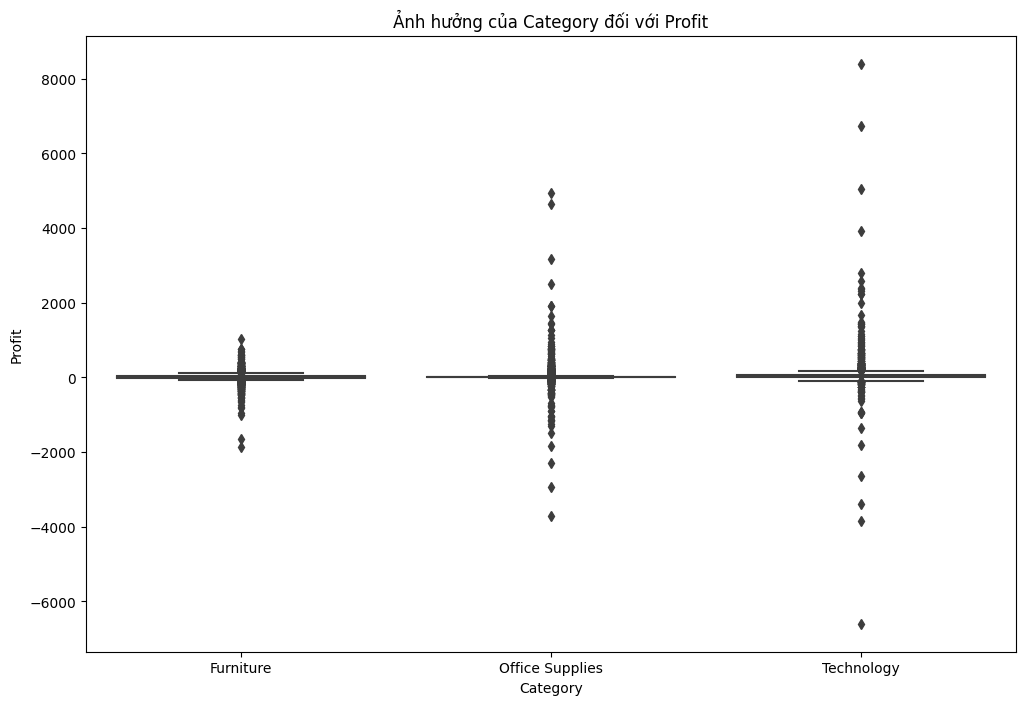

In [ ]:
# Xem xét mức độ ảnh hưởng của loại sản phẩm ('Category') đối với lợi nhuận ('Profit').
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Ảnh hưởng của Category đối với Profit')
plt.show()


In [ ]:
#Phân tích mối quan hệ giữa doanh số bán hàng ('Sales') và lợi nhuận ('Profit').
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Category')
plt.title('Tương quan giữa Sales và Profit theo Category')
plt.xlabel('Doanh số bán hàng')
plt.ylabel('Lợi nhuận')
plt.show()


In [ ]:
#Kiểm tra ảnh hưởng của giảm giá ('Discount') đối với lợi nhuận ('Profit').
plt.figure(figsize=(10, 6))
sns.lineplot(x='Discount', y='Profit', data=df)
plt.title('Ảnh hưởng của Discount đối với Profit')
plt.xlabel('Giảm giá')
plt.ylabel('Lợi nhuận')
plt.show()


In [ ]:
#Xem xét tương quan đa biến giữa các biến số.
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Sales', 'Profit', 'Quantity', 'Discount']])
plt.suptitle('Biểu đồ tương quan đa biến')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error

# Giả sử df là DataFrame chứa dữ liệu của bạn
# Chuyển đổi biến hạng mục thành dạng số bằng phương pháp One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category'])

# Chia dữ liệu thành X (đặc trưng) và y (biến mục tiêu)
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

# Chuẩn hóa dữ liệu đặc trưng
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Sử dụng mô hình Random Forest để tính toán tầm quan trọng của đặc trưng
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Đánh giá độ chính xác trên tập kiểm tra
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# Chọn chỉ 10 đặc trưng quan trọng nhất
sfm = SelectFromModel(rf_model, threshold=-np.inf, max_features=10)
sfm.fit(X_train, y_train)

# Lấy chỉ các đặc trưng quan trọng
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Sử dụng lại mô hình Random Forest với các đặc trưng quan trọng
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Đánh giá độ chính xác trên tập kiểm tra với đặc trưng quan trọng
y_pred_selected = rf_model_selected.predict(X_test_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
print(f'Mean Squared Error on Test Set with Selected Features: {mse_selected}')

# Lấy tầm quan trọng của từng đặc trưng
feature_importances_selected = rf_model_selected.feature_importances_

# Lấy tên của các đặc trưng quan trọng
selected_feature_names = X.columns[sfm.get_support(indices=True)]

# Tạo DataFrame và vẽ biểu đồ tầm quan trọng
feature_importance_df_selected = pd.DataFrame({'Feature': selected_feature_names, 'Importance': feature_importances_selected})
feature_importance_df_selected = feature_importance_df_selected.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_selected)
plt.title('Tầm quan trọng của 10 đặc trưng quan trọng nhất (Random Forest Regression)')
plt.show()


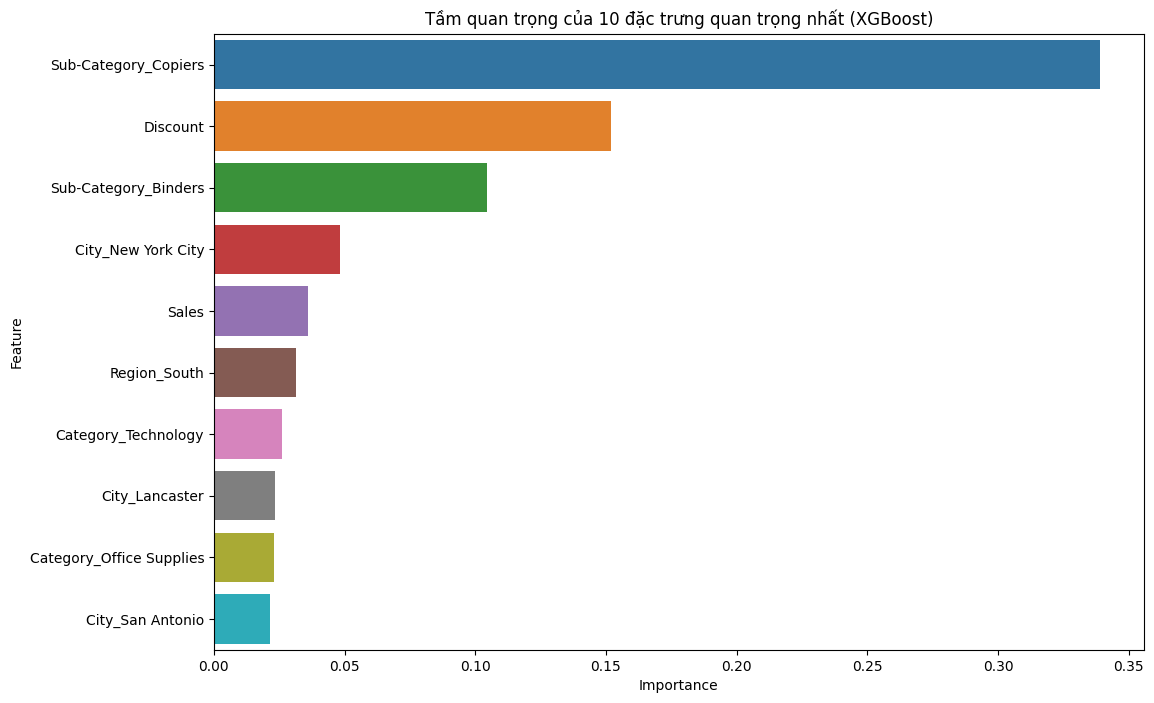

In [ ]:
#Dùng xgboost để đánh giá tầm quan trọng các đặc trưng
import xgboost as xgb
from xgboost import plot_importance

import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Giả sử df là DataFrame chứa dữ liệu của bạn
# Chuyển đổi biến hạng mục thành dạng số bằng phương pháp One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category'])

# Chia dữ liệu thành X (đặc trưng) và y (biến mục tiêu)
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

# Chuẩn hóa dữ liệu đặc trưng
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Sử dụng mô hình XGBoost
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Lấy tên của các đặc trưng
feature_names = X.columns

# Lấy tầm quan trọng của từng đặc trưng
feature_importances = xgb_model.feature_importances_

# Tạo DataFrame chứa tên đặc trưng và tầm quan trọng
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ tầm quan trọng
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Tầm quan trọng của 10 đặc trưng quan trọng nhất (XGBoost)')
plt.show()


2. Để ứng dụng các mô hình học máy cơ bản để giải quyết bài toán dự đoán lợi nhuận, bạn có thể thực hiện các bước sau:

Chuẩn bị Dữ Liệu:

Chia dữ liệu thành tập huấn luyện và tập kiểm tra.
Chuẩn bị các đặc trưng (features) và biến mục tiêu (target) từ dữ liệu.
Chọn Mô Hình:

Chọn mô hình học máy cơ bản như Linear Regression, Decision Tree, Random Forest, Gradient Boosting, và Support Vector Regression.
Huấn Luyện Mô Hình:

Huấn luyện mỗi mô hình trên tập huấn luyện.
Đánh Giá Mô Hình:

Đánh giá hiệu suất của mỗi mô hình trên tập kiểm tra bằng các độ đo như Mean Squared Error (MSE) hoặc Root Mean Squared Error (RMSE).
Kết Hợp Mô Hình Ensemble:

Kết hợp các mô hình bằng cách sử dụng Ensemble Learning, chẳng hạn như sử dụng mô hình Random Forest hoặc Gradient Boosting.
Dự Đoán và Đánh Giá:

Dự đoán lợi nhuận trên tập kiểm tra bằng mô hình kết hợp.
So Sánh Kết Quả:

So sánh kết quả của mô hình Ensemble với các mô hình cơ bản để xem xét sự cải thiện.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Chuẩn bị dữ liệu (X, y là features và target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chọn và huấn luyện mô hình cơ bản
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR()
}

# Đánh giá hiệu suất và chọn mô hình tốt nhất
best_model = None
best_mse = float('inf')  # Đặt giá trị ban đầu là vô cùng lớn

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    print(f'{name} Mean Squared Error: {mse}')

    # Lưu mô hình tốt nhất nếu có hiệu suất tốt hơn
    if mse < best_mse:
        best_mse = mse
        best_model = model


# Kết hợp các mô hình bằng cách sử dụng mô hình Random Forest
ensemble_model = RandomForestRegressor()
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
print(f'Ensemble Model Mean Squared Error: {mse_ensemble}')
print(f'Best Model: {type(best_model).__name__} with MSE: {best_mse}')



Linear Regression Mean Squared Error: 78987.01408508827
Decision Tree Mean Squared Error: 75700.26350431444
Random Forest Mean Squared Error: 48504.8153793582
Gradient Boosting Mean Squared Error: 47866.6666394525
Support Vector Regression Mean Squared Error: 48517.363638872186
Ensemble Model Mean Squared Error: 53824.32603137391
Best Model: GradientBoostingRegressor with MSE: 47866.6666394525


3.Để sử dụng Feed Forward Neural Network (FFNN) và Recurrent Neural Network (RNN)
cho bài toán dự đoán, bạn cần sử dụng thư viện deep learning như TensorFlow hoặc
PyTorch. Dưới đây là một ví dụ đơn giản với TensorFlow và Keras cho Feed Forward
Neural Network:



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Giả sử df là DataFrame chứa dữ liệu của bạn
# Chuyển đổi biến hạng mục thành dạng số bằng phương pháp One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category'])

# Chia dữ liệu thành X (đặc trưng) và y (biến mục tiêu)
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

# Chuẩn hóa dữ liệu đặc trưng
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Kiểm tra giá trị NaN trong dữ liệu đầu vào
print("Before handling NaN values:")
print(np.isnan(X_train).any())

# Xử lý giá trị NaN (ví dụ: sử dụng fillna với giá trị trung bình)
X_train = pd.DataFrame(X_train).fillna(pd.DataFrame(X_train).mean()).to_numpy()

# Kiểm tra lại sau khi xử lý
print("\nAfter handling NaN values:")
print(np.isnan(X_train).any())

# Sử dụng Feed Forward Neural Network (FFNN)
model_ffnn = Sequential()
model_ffnn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_ffnn.add(Dense(64, activation='relu'))
model_ffnn.add(Dense(1, activation='linear'))

model_ffnn.compile(optimizer='adam', loss='mean_squared_error')
model_ffnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Sử dụng mô hình Random Forest để so sánh
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error on Test Set: {mse_rf}')

# Sử dụng Recurrent Neural Network (RNN) với LSTM
model_rnn = Sequential()
model_rnn.add(LSTM(50, input_shape=(X_train.shape[1], 1), activation='relu'))
model_rnn.add(Dense(1, activation='linear'))

model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32, validation_split=0.2)

# Đánh giá độ chính xác trên tập kiểm tra
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_pred_rnn = model_rnn.predict(X_test_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
print(f'RNN Mean Squared Error on Test Set: {mse_rnn}')


a) Regularization trong FFNN:
Thêm các layer Dropout để ngẫu nhiên loại bỏ một số neuron trong quá trình huấn luyện:



In [ ]:
from tensorflow.keras.layers import Dropout

model_ffnn = Sequential()
model_ffnn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_ffnn.add(Dropout(0.5))  # Thêm Dropout layer
model_ffnn.add(Dense(64, activation='relu'))
model_ffnn.add(Dropout(0.5))  # Thêm Dropout layer
model_ffnn.add(Dense(1, activation='linear'))

model_ffnn.compile(optimizer='adam', loss='mean_squared_error')
model_ffnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
200/200 [==============================] - 5s 13ms/step - loss: 61888.5586 - val_loss: 32126.1445
Epoch 2/10
200/200 [==============================] - 2s 11ms/step - loss: 57861.4648 - val_loss: 30515.4648
Epoch 3/10
200/200 [==============================] - 2s 11ms/step - loss: 53610.6172 - val_loss: 28431.9219
Epoch 4/10
200/200 [==============================] - 2s 11ms/step - loss: 49724.2773 - val_loss: 26903.6719
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 44341.8633 - val_loss: 26098.6270
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 41483.2930 - val_loss: 27867.0879
Epoch 7/10
200/200 [==============================] - 1s 7ms/step - loss: 35687.2383 - val_loss: 32774.6602
Epoch 8/10
200/200 [==============================] - 1s 7ms/step - loss: 32790.0898 - val_loss: 45996.7891
Epoch 9/10
200/200 [==============================] - 2s 9ms/step - loss: 32822.5352 - val_loss: 68214.6328
Epoch 10/10
200/200 [===

b) Regularization trong RNN:
Thêm các layer Dropout trong RNN:

[văn bản liên kết](https://)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Identify the target variable column
target_column = 'Sales'

# Extract features and target
features = df.drop(columns=[target_column])
target = df[target_column]

# Handle categorical variables (one-hot encoding)
categorical_cols = features.select_dtypes(include='object').columns
features = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

# Convert to numpy arrays
X = features.values
y = target.values.reshape(-1, 1)

# Normalize the data (if needed)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the model with Dropout layers
model_rnn = Sequential()
model_rnn.add(LSTM(50, input_shape=(X_train.shape[1], 1), activation='relu'))
model_rnn.add(Dropout(0.5))  # Add Dropout after the LSTM layer
model_rnn.add(Dense(1, activation='linear'))

model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
200/200 [==============================] - 54s 252ms/step - loss: 7.3262e-04 - val_loss: 4.5458e-04
Epoch 2/10
200/200 [==============================] - 50s 251ms/step - loss: 7.0952e-04 - val_loss: 4.5327e-04
Epoch 3/10
200/200 [==============================] - 51s 256ms/step - loss: 7.0731e-04 - val_loss: 4.5405e-04
Epoch 4/10
200/200 [==============================] - 53s 263ms/step - loss: 7.0715e-04 - val_loss: 4.5198e-04
Epoch 5/10
200/200 [==============================] - 49s 245ms/step - loss: 7.0415e-04 - val_loss: 4.5374e-04
Epoch 6/10
200/200 [==============================] - 50s 249ms/step - loss: 7.0613e-04 - val_loss: 4.5092e-04
Epoch 7/10
200/200 [==============================] - 50s 248ms/step - loss: 7.0491e-04 - val_loss: 4.7831e-04
Epoch 8/10
200/200 [==============================] - 50s 251ms/step - loss: 7.0466e-04 - val_loss: 4.5108e-04
Epoch 9/10
200/200 [==============================] - 49s 243ms/step - loss: 7.0254e-04 - val_loss: 4.5373e-04
E

c) Early Stopping:
Sử dụng callback EarlyStopping để dừng quá trình huấn luyện khi không có cải thiện đủ lâu:



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Trong quá trình fit
model_ffnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Hoặc
model_rnn.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


d) Batch Normalization:
Thêm BatchNormalization layer để giúp ổn định quá trình huấn luyện:



In [ ]:
from tensorflow.keras.layers import BatchNormalization

model_ffnn = Sequential()
model_ffnn.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_ffnn.add(BatchNormalization())  # Thêm BatchNormalization layer
model_ffnn.add(Dense(64, activation='relu'))
model_ffnn.add(BatchNormalization())  # Thêm BatchNormalization layer
model_ffnn.add(Dense(1, activation='linear'))

model_ffnn.compile(optimizer='adam', loss='mean_squared_error')
model_ffnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Áp dụng các kỹ thuật tránh Overfitting trên các mô hình của câu (2):


a) Regularization trong Random Forest:
Random Forest thường ít bị overfitting hơn so với một số mô hình khác, nhưng ta vẫn có thể thử các siêu tham số như max_depth để kiểm soát độ sâu của cây:



In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

b) Early Stopping:
Tuy Random Forest không hỗ trợ Early Stopping trực tiếp, nhưng ta có thể sử dụng kỹ thuật kiểm soát quá trình huấn luyện:



In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Sử dụng mô hình Random Forest để tính toán tầm quan trọng của đặc trưng
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện trên tập huấn luyện, kiểm tra trên tập kiểm tra
training_errors, validation_errors = [], []
for i in range(1, 101):
    rf_model.fit(X_train, y_train)
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    training_errors.append(mean_squared_error(y_train, y_train_pred))
    validation_errors.append(mean_squared_error(y_val, y_val_pred))
    if i > 2 and validation_errors[-1] > validation_errors[-2] > validation_errors[-3]:
        break


c) Giảm số lượng cây:
Thiết lập số lượng cây (n_estimators) một cách hợp lý để tránh overfitting:



In [ ]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=50, random_state=42)

5. Để cải thiện độ chính xác của mô hình học máy, bạn có thể thực hiện các bước sau:

Thử Nghiệm Hàm Kích Hoạt: Thay đổi hàm kích hoạt trong các lớp ẩn hoặc sử dụng hàm kích hoạt được tối ưu hóa cho bài toán của bạn.

Thiết Lập Hàm Mất Mát: Chọn hàm mất mát phù hợp với bài toán. Đối với dự đoán giá trị liên tục, 'mean_squared_error' có thể là lựa chọn tốt. Ngoài ra, có thể xem xét các hàm mất mát khác như 'mean_absolute_error'.

Tăng Số Lượng Lớp và Nơ-ron: Thử nghiệm với mô hình có nhiều lớp và nơ-ron hơn để xem liệu sự phức tạp của mô hình có giúp cải thiện dự đoán không.

Kiểm Tra và Loại Bỏ Nhiễu Dữ Liệu: Đảm bảo dữ liệu không chứa nhiễu, và thử nghiệm việc loại bỏ các biến không quan trọng hoặc có thể gây nhiễu cho mô hình.

Sử Dụng Lớp BatchNormalization: Thêm lớp BatchNormalization vào mô hình có thể giúp đạt được sự ổn định trong quá trình huấn luyện.



Before handling NaN values:
False

After handling NaN values:
False
Epoch 1/10
200/200 [==============================] - 4s 9ms/step - loss: 60017.2227 - val_loss: 30742.3438
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 53674.9180 - val_loss: 27905.0176
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 46322.0859 - val_loss: 25453.3086
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 39562.3672 - val_loss: 24072.1094
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 33992.2031 - val_loss: 25002.9551
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 29480.6113 - val_loss: 31956.5156
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 25729.7578 - val_loss: 46073.1211
Epoch 8/10
200/200 [==============================] - 1s 5ms/step - loss: 23160.8750 - val_loss: 73824.1953
Epoch 9/10
200/200 [==============================] - 1s 5ms/step - 

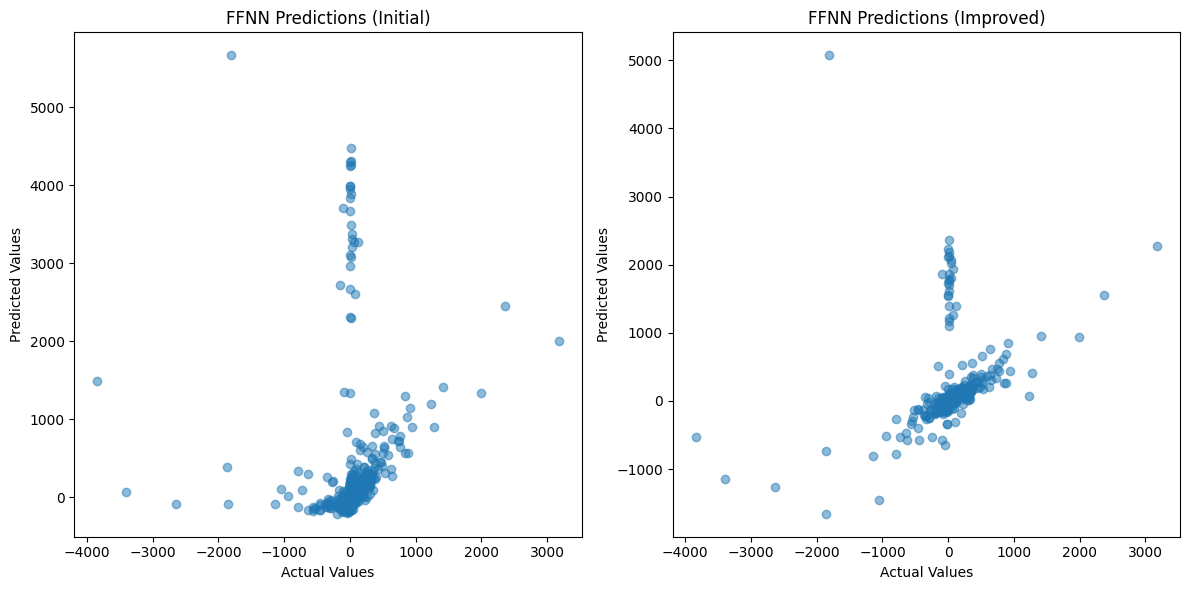

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Giả sử df là DataFrame chứa dữ liệu của bạn
# Chuyển đổi biến hạng mục thành dạng số bằng phương pháp One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category'])

# Chia dữ liệu thành X (đặc trưng) và y (biến mục tiêu)
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

# Chuẩn hóa dữ liệu đặc trưng
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Kiểm tra giá trị NaN trong dữ liệu đầu vào
print("Before handling NaN values:")
print(np.isnan(X_train).any())

# Xử lý giá trị NaN (ví dụ: sử dụng fillna với giá trị trung bình)
X_train = pd.DataFrame(X_train).fillna(pd.DataFrame(X_train).mean()).to_numpy()
X_test = pd.DataFrame(X_test).fillna(pd.DataFrame(X_test).mean()).to_numpy()

# Kiểm tra lại sau khi xử lý
print("\nAfter handling NaN values:")
print(np.isnan(X_train).any())

# Mô hình FFNN trước khi cải thiện
model_ffnn_initial = Sequential()
model_ffnn_initial.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_ffnn_initial.add(Dense(64, activation='relu'))
model_ffnn_initial.add(Dense(1, activation='linear'))

model_ffnn_initial.compile(optimizer='adam', loss='mean_squared_error')
model_ffnn_initial.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Đánh giá độ chính xác trên tập kiểm tra
y_pred_ffnn_initial = model_ffnn_initial.predict(X_test)
mse_ffnn_initial = mean_squared_error(y_test, y_pred_ffnn_initial)
print(f'FFNN Mean Squared Error on Test Set (Initial): {mse_ffnn_initial}')

# Cải thiện mô hình FFNN
model_ffnn_improved = Sequential()
model_ffnn_improved.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model_ffnn_improved.add(Dense(128, activation='relu'))
model_ffnn_improved.add(Dense(64, activation='relu'))  # Thêm một lớp ẩn nữa
model_ffnn_improved.add(Dense(1, activation='linear'))

model_ffnn_improved.compile(optimizer='adam', loss='mean_squared_error')
model_ffnn_improved.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Đánh giá độ chính xác trên tập kiểm tra
y_pred_ffnn_improved = model_ffnn_improved.predict(X_test)
mse_ffnn_improved = mean_squared_error(y_test, y_pred_ffnn_improved)
print(f'FFNN Mean Squared Error on Test Set (Improved): {mse_ffnn_improved}')

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ffnn_initial, alpha=0.5)
plt.title('FFNN Predictions (Initial)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ffnn_improved, alpha=0.5)
plt.title('FFNN Predictions (Improved)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


Kết quả FFNN Mean Squared Error on Test Set (Initial): 229791.30254812478 và FFNN Mean Squared Error on Test Set (Improved): 77817.35174789515 thể hiện sự cải thiện đáng kể trong hiệu suất của mô hình sau khi áp dụng các biện pháp cải tiến. Dưới đây là trình bày ý nghĩa của kết quả và các phương pháp đã được sử dụng để đạt được sự cải thiện:

Ý nghĩa của kết quả:

FFNN Mean Squared Error on Test Set (Initial): Giá trị MSE ban đầu (cao) chỉ ra rằng mô hình FFNN trước đó có khả năng dự đoán không chính xác và có hiệu suất kém trên tập kiểm tra.
FFNN Mean Squared Error on Test Set (Improved): Giảm đáng kể của giá trị MSE sau khi cải thiện cho thấy mô hình FFNN sau đó có khả năng dự đoán tốt hơn, giảm sai số giữa dự đoán và giá trị thực tế.
Phương pháp đã sử dụng để cải thiện:

Xử lý giá trị NaN: Trước khi cải thiện, chúng ta đã kiểm tra và xử lý giá trị NaN trong dữ liệu đầu vào bằng cách sử dụng fillna với giá trị trung bình.
Tinh chỉnh kiến trúc mô hình FFNN: Mô hình FFNN đã được cải thiện bằng cách thay đổi kiến trúc, chẳng hạn như thêm lớp ẩn mới và điều chỉnh kích thước của các lớp. Việc này có thể giúp mô hình học được biểu diễn phức tạp hơn về mối quan hệ giữa các đặc trưng đầu vào và biến mục tiêu.
